In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7284bc393f4def48b506e6cdc4ae316


In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | urucara
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | zhanaozen
Processing Record 5 of Set 1 | kamaishi
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | disna
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | celestun
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | christchurch
Processing Record 15 of Set 1 | berdigestyakh
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | suntar
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | villa carlos paz
Processing Record 22 of Set 1 | itoman
Processing Record 23 of Set 1 | r

Processing Record 34 of Set 4 | naze
Processing Record 35 of Set 4 | mayumba
Processing Record 36 of Set 4 | ostersund
Processing Record 37 of Set 4 | campoverde
Processing Record 38 of Set 4 | manono
Processing Record 39 of Set 4 | coihaique
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | mawlaik
Processing Record 42 of Set 4 | babanusah
City not found. Skipping...
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | shenjiamen
Processing Record 45 of Set 4 | oistins
Processing Record 46 of Set 4 | bitung
Processing Record 47 of Set 4 | obala
Processing Record 48 of Set 4 | maragogi
Processing Record 49 of Set 4 | saint-pierre
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | abu samrah
Processing Record 5 of Set 5 | mayo
Processing Record 6 of Set 5 | pakxan
Processing

Processing Record 25 of Set 8 | fukue
Processing Record 26 of Set 8 | abengourou
Processing Record 27 of Set 8 | evensk
Processing Record 28 of Set 8 | fairview
Processing Record 29 of Set 8 | tutoia
Processing Record 30 of Set 8 | lingao
Processing Record 31 of Set 8 | kailua
Processing Record 32 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 33 of Set 8 | vung tau
Processing Record 34 of Set 8 | jabinyanah
Processing Record 35 of Set 8 | weyburn
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | sungairaya
Processing Record 39 of Set 8 | mabamba
Processing Record 40 of Set 8 | hamilton
Processing Record 41 of Set 8 | high level
Processing Record 42 of Set 8 | wanning
Processing Record 43 of Set 8 | ninotsminda
Processing Record 44 of Set 8 | bikapur
Processing Record 45 of Set 8 | rudbar
Processing Record 46 of Set 8 | key west
Processing Record 47 of Set 8 | xuddur
Processing Record 48 of Set 8 | bentiu
P

Processing Record 15 of Set 12 | kuryk
Processing Record 16 of Set 12 | ucluelet
Processing Record 17 of Set 12 | batagay-alyta
Processing Record 18 of Set 12 | waitati
Processing Record 19 of Set 12 | ler
Processing Record 20 of Set 12 | cap-aux-meules
Processing Record 21 of Set 12 | olindina
Processing Record 22 of Set 12 | gondar
Processing Record 23 of Set 12 | cabo san lucas
Processing Record 24 of Set 12 | constitucion
Processing Record 25 of Set 12 | vila velha
Processing Record 26 of Set 12 | upington
Processing Record 27 of Set 12 | puerto leguizamo
Processing Record 28 of Set 12 | seddon
Processing Record 29 of Set 12 | shimonoseki
Processing Record 30 of Set 12 | cravo norte
Processing Record 31 of Set 12 | lovington
Processing Record 32 of Set 12 | letterkenny
Processing Record 33 of Set 12 | utena
Processing Record 34 of Set 12 | sitka
Processing Record 35 of Set 12 | grand gaube
Processing Record 36 of Set 12 | kuche
City not found. Skipping...
Processing Record 37 of Se

In [18]:
len(city_data)

587

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Urucara,-2.5364,-57.7600,83.57,84,99,1.95,BR,2021-02-02 20:24:09
1,Bilibino,68.0546,166.4372,-3.06,85,6,5.32,RU,2021-02-02 20:24:09
2,Mehamn,71.0357,27.8492,24.80,80,90,24.16,NO,2021-02-02 20:24:09
3,Zhanaozen,43.3000,52.8000,43.72,64,91,18.66,KZ,2021-02-02 20:24:09
4,Kamaishi,39.2667,141.8833,22.21,86,0,6.08,JP,2021-02-02 20:24:09
5,Barrow,71.2906,-156.7887,-22.00,76,1,12.66,US,2021-02-02 20:21:05
6,Rikitea,-23.1203,-134.9692,77.97,76,77,15.35,PF,2021-02-02 20:21:03
7,Provideniya,64.3833,-173.3000,8.15,91,100,16.51,RU,2021-02-02 20:21:26
8,Bilma,18.6853,12.9164,66.22,25,0,7.29,NE,2021-02-02 20:24:10
9,Disna,55.5680,28.1971,22.30,97,100,15.57,BY,2021-02-02 20:24:10


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [21]:
city_data_df = city_data_df[new_column_order]

In [22]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Urucara,BR,2021-02-02 20:24:09,-2.5364,-57.7600,83.57,84,99,1.95
1,Bilibino,RU,2021-02-02 20:24:09,68.0546,166.4372,-3.06,85,6,5.32
2,Mehamn,NO,2021-02-02 20:24:09,71.0357,27.8492,24.80,80,90,24.16
3,Zhanaozen,KZ,2021-02-02 20:24:09,43.3000,52.8000,43.72,64,91,18.66
4,Kamaishi,JP,2021-02-02 20:24:09,39.2667,141.8833,22.21,86,0,6.08
5,Barrow,US,2021-02-02 20:21:05,71.2906,-156.7887,-22.00,76,1,12.66
6,Rikitea,PF,2021-02-02 20:21:03,-23.1203,-134.9692,77.97,76,77,15.35
7,Provideniya,RU,2021-02-02 20:21:26,64.3833,-173.3000,8.15,91,100,16.51
8,Bilma,NE,2021-02-02 20:24:10,18.6853,12.9164,66.22,25,0,7.29
9,Disna,BY,2021-02-02 20:24:10,55.5680,28.1971,22.30,97,100,15.57


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

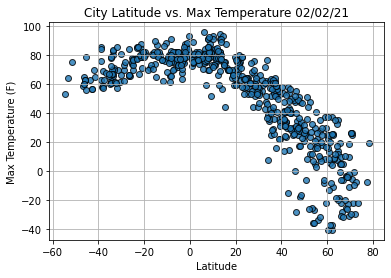

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

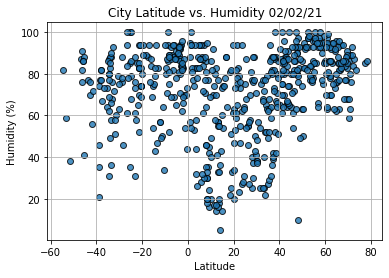

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


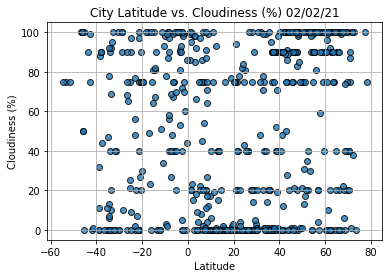

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

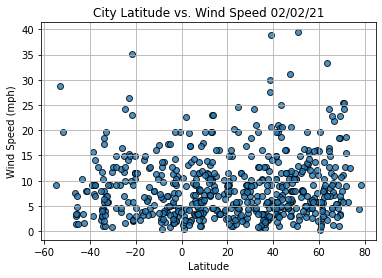

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()